<p style='text-align: justify'>

# Modelling Population Dynamics of Organisms and negative density dependence

## Introduction

When looking at organisms in the wild, we often have to build models in order to make predictions about changes in their population[$^{[1]}$](#References). Many different factors can drive changes in the population of organisms. In this example, we will be considering the effects of finite resources on the growth of the number of rabbits or crabs in a toy model

This entire project is going to explore a simple mathematical equation and how it can give insights into ecological systems. Such mathematical equations are often referred to as models. There are two types of models in mathematical biology, a discrete time model and continuous time model[$^{[2]}$](#References). For the purposes of this project, we are only going to be looking at discrete time models.

### Discrete Time model

A discrete time model is essentially a model that has time at set intervals. You can think of this as the model having a finite number of data points starting from the initial time to some final time taking steps of some time interval. For example, if we choose a time interval is 1 second, there will be a data point at 1 second, then the next at 2 seconds, but not at 1.5 seconds.

Oftentimes, discrete time models use something called a difference equation[$^{[3]}$](#References) (not to be confused with its mathematical older brother, differential equations) which have this form (assuming $A_t$ is a certain species population at time $t$):

$$A_{t+1} = kA_t$$

Where the species population at time $t+1$ is directly affected by the species population at time $t$.

## Why it is important to study this?

Mathematical models that predict biological systems will give us insights and predictions on future systems. Assuming we are an employee of NParks, and we would want to predict if a certain environmental measure is helping with improving the ecosystem. We would then have a mathematical model of how certain species of animals are growing and see if various populations of species would die out.

An example of this would be the tree types and populations in Singapore mangroves affecting the population of Tree-climbing crabs (_Episesarma spp._). Studying these crabs are particularly important because they recycle carbon on the mangrove floors and aid in decomposition, which makes them a keystone species[$^{[4]}$](#References). The loss of habitat could result in potential threat to them[$^{[5]}$](#References), which would be really bad!


## Fibonacci Model

So let's take a look at a very simple model first.
A simple model is the Fibonacci rabbit problem[$^{[6]}$](#Reference). Assuming a population of adult rabbits, $A$, juvenile rabbits, $J$ at time, $t$, where it follows this formula: $$A_{t+1} = J_{t} + A_t$$

This is because the number of adult rabbits is governed by how many adult rabbits there are and number of juvenile rabbits that will mature to become adult rabbits. However, the number of juvenile rabbits are also governed by how many adult rabbits there are too!


| $$t$$   |  $$A_t$$            |   $$J_t$$ |
|---------|:-------------------:|:-------------------:|
| $$t_0$$ | 2                   |1                    |
| $$t_1$$ | 3                   |2                    |
| $$t_2$$ | 5                   |3                    |
| $$t_3$$ | 8                   |5                    |
| $$t_4$$ | 13                  |8                    |
| $$t_n$$ | $$A_{t-1} + A_{t}$$ |$$J_{t-1} + J_{t}$$  |

This means that, we start with 2 rabbits and these 2 rabbits would produce 1 rabbit. Then these 3 rabbits would produce 2 additional rabbits and so on.

We can actually simplify the equation to this for ease of modelling later!

$$A_{t+1} = A_{t-1} + A_t$$

As you can already tell, it is tedious to generate a table like this, so let us do it in code instead!

### Putting this into context

Now, what if we **ARE** a manager of NParks and we want to track the population of _Episesarma spp._ over time in Singapore? We can employ the same model and assume the population of crabs follow the fibonacci sequence.
    
</p>

In [10]:
# Import things
import numpy as np
import matplotlib.pyplot as plt

In [11]:
# Simulate a timeframe
ts = np.arange(0,10)

# Initialize a list to store our As
As = [1]*len(ts)

# Let us run a loop to simulate our model
for t in ts:
    # The formula of our model
    As[t] = As[t-2] + As[t-1]

Now that we have the results from the model, we can plot them using `ts` as our x-axis and `As` as our `y-axis`.

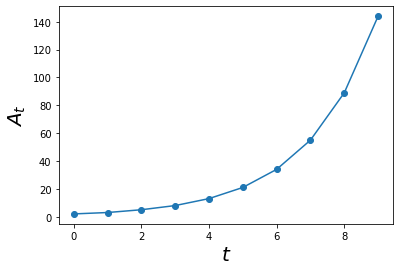

In [12]:
plt.plot(ts, As,'o-')
plt.xlabel('$t$', size = 20)
plt.ylabel('$A_t$', size = 20)
plt.show()

<p style='text-align: justify'>

### Simplifying the workflow
Since we would be exploring more models today, it would be nice to simulate these models easily. Hence, we can push all of these code into 1 function, `simulate_func`.

If we inspect our modelling code from before, we can point out some things:
```python
ts = np.arange(0,10) #<-- Array of time steps with 10 being max_t
As = [1]*len(ts)
for t in ts:
    As[t] = As[t-2] + As[t-1] #<-- Func to calc A_t+1 using A_t & A_t-1
```


`simulate_func` will take in arguments, the modelling function `func` and, `max_t` for the maximum time frame.

We then need to make a function to calculate A_t of the next time step, we can easily do this by passing in the time t and a list of As so we can use list indexing:

```python
def fibo_func(As,t):
    return As[t-2] + As[t-1]
```
    
</p>

In [13]:
def simulate_func(func, max_t, A0 = 1):
    ts = np.arange(0,max_t)
    As = [A0]*len(ts)
    for t in ts:
        As[t] = func(As,t)
    return As

def fibo_func(As,t):
    return As[t-2] + As[t-1]

# Yep this works for us!
simulate_func(fibo_func, 10)

[2, 3, 5, 8, 13, 21, 34, 55, 89, 144]

<p style='text-align: justify'>
If you think about the previous crab model, it is a little unrealistic. This is because if the crab population did follow that curve, there would be infinite crabs in the world and every tree would be filled with CRABS! Regardless of how great that would be, we know this is not true in the real world because we are not surrounded by crabs.

So what is going on here?

## Negative Density Dependence

Every biological system has limited resources (carrying capacity `K`) such as limited space and food sources. Hence the population of species in every environment would be limited in some way! Thus, we would need to introduce it in some way.

I would not go into the details as to how this model came about[$^{[7]}$](#References), just... magic. Let `N` be the number of individuals and `r` to be a reproductive rate.

$$N_{t+1} = \left(1+r\left(1-\frac{N_t}{K}\right)\right)N_t$$

This system is modelled below using our previously defined function.
</p>

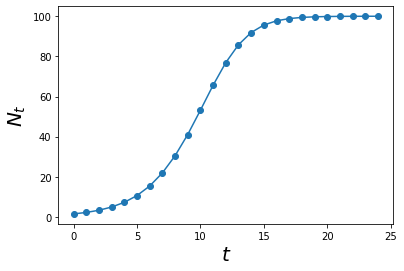

In [14]:
r = 0.5
K = 100
def density_dependence(Ns,t):
    y = (1 + r*(1-(Ns[t-1]/K)))*Ns[t-1]
    return y


max_t = 25
Ns = simulate_func(density_dependence, max_t)
ts = np.arange(0,max_t)

plt.plot(ts, Ns,'o-')
plt.xlabel('$t$', size = 20)
plt.ylabel('$N_t$', size = 20)
plt.show()

If we relate this new crab model to the original fibonacci crab model, intuitively we know that this is more realistic.

Let us plot this new graph with the previous one and see the difference!

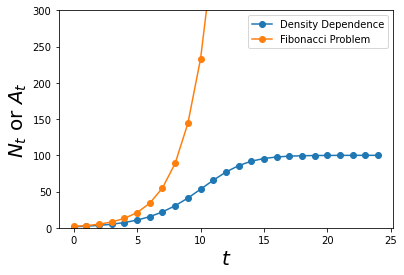

In [15]:
max_t = 25
Ns = simulate_func(density_dependence, max_t)
ts = np.arange(0,max_t)

As = simulate_func(fibo_func, max_t)

ts = np.arange(0,max_t)

plt.plot(ts, Ns,'o-', label = 'Density Dependence')
plt.plot(ts, As,'o-', label = 'Fibonacci Problem')

plt.ylim(0,300)
plt.xlabel('$t$', size = 20)
plt.ylabel('$N_t$ or $A_t$', size = 20)
plt.legend()
plt.show()

<p style='text-align: justify'>
Just like how intuition has told us, the fibonacci crab model predicts the population to grow geometrically and there would be infinite crabs given infinite time. Whereas, according to the density dependence model, given infinite time, the population of crabs would stay constant.

This model is more in-line with what we see in reality! Let us explore this model further.

### Equilibrium
Let us see what happens if we forcefully decrease the population of crabs at `time = 20`. This could be due to mass poaching by the locals or rising sea levels which submerges a significant number of trees which decreases the available trees that crabs can climb on to avoid predators. 
</p>

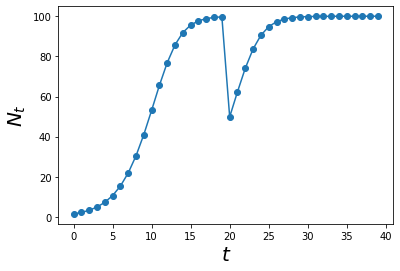

In [16]:
def density_dependence_perturb(Ns,t):
    y = (1 + r*(1-(Ns[t-1]/K)))*Ns[t-1]
    
    # At time t = 20, forcefully drop the population by 50
    if t == 20:
        y -= 50
    return y

max_t = 40
Ns = simulate_func(density_dependence_perturb, max_t)
ts = np.arange(0,max_t)

plt.plot(ts, Ns,'o-')
plt.xlabel('$t$', size = 20)
plt.ylabel('$N_t$', size = 20)
plt.show()

<p style='text-align: justify'>
This is interesting. It seems like if we introduce a change in population (pertubation), the system still grows to a certain point. This is called a stable equilibrium!

## Logistic Map

The previous model: $$N_{t+1} = \left(1+r\left(1-\frac{N_t}{K}\right)\right)N_t$$

We can get rid of both `K` and `r` by doing cool math and replace them with `a`. This is important because it makes the analysis simpler as we went from a model with two parameter to a model with one[$^{[8]}$](#References)!

$$x_t = \frac{r}{1+r}\frac{N_t}{K}, a = 1+r$$

And thus:

$$x_{t+1} = ax_t(1-x_t)$$

An important thing about this model is that the maximum number $x$ can be is `1.0` and thus the population of crabs now is a PROPORTION of the carrying capacity ($K$) instead of an absolute number.
</p>

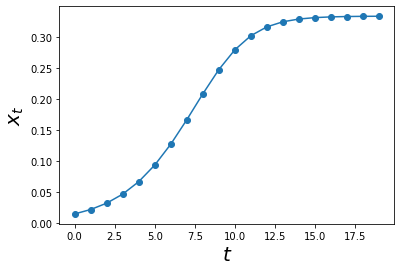

In [17]:
a = 1.5

def log_map(xs,t):
    y = a*xs[t-1]*(1-xs[t-1])
    return y

max_t = 20
xs = simulate_func(log_map, max_t, A0 = 0.01)
ts = np.arange(0,max_t)

plt.plot(ts, xs,'o-')
plt.xlabel('$t$', size = 20)
plt.ylabel('$x_t$',size = 20)
plt.show()

An interesting thing we can do now is to vary the value of `a` and check the dynamics!

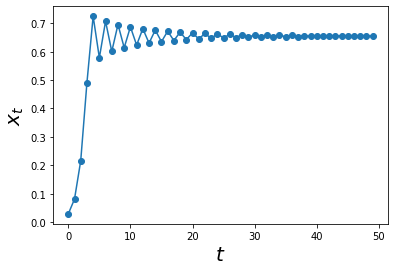

In [18]:
a = 2.9
max_t = 50
xs = simulate_func(log_map, max_t, A0 = 0.01)
ts = np.arange(0,max_t)

plt.plot(ts, xs,'o-')
plt.xlabel('$t$', size = 20)
plt.ylabel('$x_t$',size = 20)
plt.show()

<p style='text-align: justify'>
Cool, by increasing the value of `a = 2.9`, we can see some interesting oscilations. However, these oscilations do not last forever. As we increased `max_t = 50`, we can see that these oscilations start to **dampen** and eventually reach the state previously explored :)

### What this means for our model?

This model somewhat follows real-life biological systems more closely than our other models so far. This is because there are some sort of variation being introduced before equilibrium is reached!

## Future Works

This analysis of this logistic map model is nowhere near complete. There are a few things that we can further explore, some of which include but not limited to:

1. Increasing the value of `a` and see if you observe interesting behaviour such a cyclical behaviour or even chaotic behaviour
2. Prove that a behaviour is cyclical or chaotic (if any) 
3. Find out the equilibrium values at each value of `a` and plot them on a graph called a bifurcation plot and comment
4. Find out the equilibrium values at each value of `A0` and plot them on a graph called a bifurcation plot and comment
</p>

## References

\[1\] Torres, N. V.; Santos, G. The (Mathematical) Modeling Process in Biosciences. Frontiers in Genetics, 2015, 6. https://doi.org/10.3389/fgene.2015.00354.
<br>
\[2\] Motta, S.; Pappalardo, F. Mathematical Modeling of Biological Systems. Briefings in Bioinformatics, 2012, 14, 411–422. https://doi.org/10.1093/bib/bbs061.
<br>
\[3\] Discrete-Time Models with Difference Equations https://math.libretexts.org/@go/page/7782.
<br>
\[4\] Lee, S. Potential Trophic Importance of the Faecal Material of the Mangrove Sesarmine Crab Sesarma Messa. Marine Ecology Progress Series, 1997, 159, 275–284. https://doi.org/10.3354/meps159275.
<br>
\[5\] Sivasothi, N. Niche Preferences of Tree-climbing Crabs in Singapore Mangroves. Crustaceana, 2000, 73, 25–38. https://doi.org/10.1163/156854000504093.
<br>
\[6\] Sigler, L. Fibonacci's Liber Abaci, Springer 2002.
<br>
\[7\] Density Dependence, Regulation and Variability in Animal Populations. Philosophical Transactions of the Royal Society of London. Series B: Biological Sciences, 1990, 330, 141–150. https://doi.org/10.1098/rstb.1990.0188.
<br>
\[8\] Logistic Population Growth https://bio.libretexts.org/@go/page/14190.